In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('/Users/chengchen/Documents/GitHub/Analyzing-COVID19-Search-Trends-and-Hospitalization/merged_dataset.csv')

In [3]:
df = df.sample(frac = 1) 

In [4]:
X = df.drop(columns=['Unnamed: 0','open_covid_region_code','country_region_code',
                    'country_region_code','country_region','sub_region_1','date','hospitalized_new'])

In [5]:
y = df['hospitalized_new'].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [8]:
max_depth = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40]
mse = []
for n in max_depth:
    tree = DecisionTreeRegressor(max_depth=n)
    scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse.append(-1*scores.mean()) 

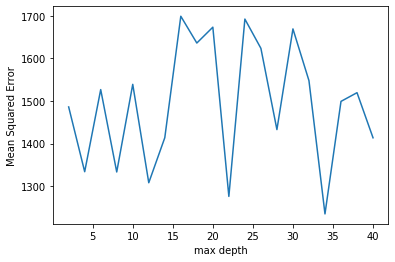

In [9]:
plt.plot(max_depth, mse)
plt.xlabel("max depth")
plt.ylabel("Mean Squared Error")
plt.show()
best_depth = max_depth[mse.index(min(mse))]

In [10]:
#train the model
print(best_depth)
tree = DecisionTreeRegressor(max_depth=best_depth)
tree.fit(X_train,y_train)

34


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=34,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [11]:
pred=tree.predict(X_test)
mse = ((pred - y_test)**2).mean(axis=None)
print(mse)

753.2727272727273
